## Prerequisites

This project uses the publicly available [Diverse Dermatology Images (DDI) dataset](https://aimi.stanford.edu/datasets/ddi-diverse-dermatology-images) curated by Stanford University. The DDI dataset contains pathologically confirmed dermatological images representing diverse skin tones.

### Dataset Requirements
- The complete DDI dataset must be downloaded from the official Stanford repository
- Images and metadata must be stored in the `data` folder in your project root directory
- Expected structure:
  - `data/images/` - Contains all dermatological images
  - `data/ddi_metadata.csv` - Contains metadata and ground truth labels

### Environment Setup
Install the required packages from `requirements.txt` file.

### Notebook Structure

This notebook follows a structured workflow:
- Loading required libraries
- Defining constants
- Loading and exploring metadata
- Analysing class distribution
- Converting labels to numeric format
- Storing processed data for model training

## Libraries

In [1]:
# Standard library imports
import os
from pathlib import Path

# Third-party imports
import pandas as pd
import matplotlib.pyplot as plt

## Constants

In [2]:
random_state = 42

# Data paths
root_path = Path.cwd().parent
metadata_path = root_path / 'data' / 'raw_dataset' / 'ddi_metadata.csv'
image_path = root_path / 'data' / 'raw_dataset' / 'images'

## Load Metadata

In [3]:
# Load metadata
metadata = pd.read_csv(metadata_path)
metadata

,Unnamed: 0,DDI_ID,DDI_file,skin_tone,malignant,disease
0,0,1,000001.png,56,True,melanoma-in-situ
1,1,2,000002.png,56,True,melanoma-in-situ
2,2,3,000003.png,56,True,mycosis-fungoides
3,3,4,000004.png,56,True,squamous-cell-carcinoma-in-situ
4,4,5,000005.png,12,True,basal-cell-carcinoma
...,...,...,...,...,...,...
651,651,652,000652.png,34,False,pyogenic-granuloma
652,652,653,000653.png,34,False,melanocytic-nevi
653,653,654,000654.png,34,False,acral-melanotic-macule
654,654,655,000655.png,34,True,squamous-cell-carcinoma


## Label Distribution

Visualise the distribution of malignant and benign cases in our dataset, which is critical for understanding class imbalance. The histogram below shows the frequency of each class (malignant vs. benign) in our dataset. This information will help us determine appropriate strategies for handling imbalance during model training, such as resampling techniques or class weighting.

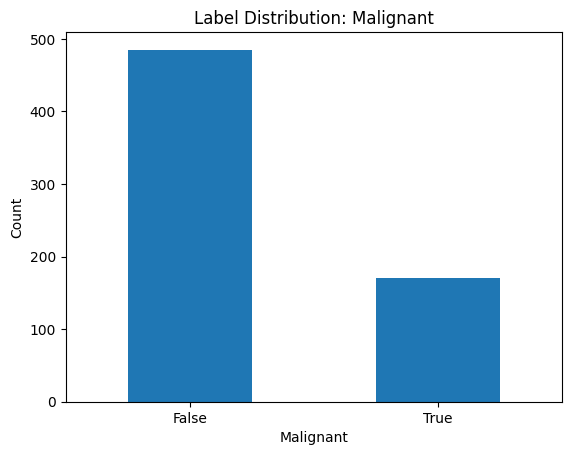

In [4]:
# Plot bar chart for label distribution
metadata['malignant'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Malignant')
plt.ylabel('Count')
plt.title('Label Distribution: Malignant')
plt.show()

## Data Imbalance Analysis

The histogram above reveals a significant class imbalance in our dataset, with benign cases (label 'False') outnumbering malignant cases (label 'True'). This imbalance presents several challenges for model training:

1. **Classification bias**: Models may develop a bias toward the majority class (benign), potentially misclassifying malignant samples
2. **Performance metrics**: Accuracy alone would be misleading in this context, as a naive classifier predicting all samples as benign would still achieve high accuracy
3. **Clinical implications**: In medical diagnostics, false negatives (missing actual malignant cases) can have serious consequences

We'll need to address this imbalance through techniques such as:
- Resampling methods (undersampling or oversampling)
- Class weighting in the loss function
- Specialised evaluation metrics (F1-score, precision-recall AUC)

## Label Conversion

Converting categorical labels to numeric format is an essential preprocessing step for machine learning models. In our case, we're converting the 'malignant' boolean feature (True/False) to binary integers (1/0), where:
- 1 represents malignant cases (positive class)
- 0 represents benign cases (negative class)

In [5]:
# Convert 'malignant' column to integer type
metadata['malignant'] = metadata['malignant'].astype(int)
metadata.tail()

,Unnamed: 0,DDI_ID,DDI_file,skin_tone,malignant,disease
651,651,652,000652.png,34,0,pyogenic-granuloma
652,652,653,000653.png,34,0,melanocytic-nevi
653,653,654,000654.png,34,0,acral-melanotic-macule
654,654,655,000655.png,34,1,squamous-cell-carcinoma
655,655,656,000656.png,34,1,basal-cell-carcinoma


## Store Metadata

The updated CSV will be stored in the data directory, ensuring consistency across our workflow. This version of the metadata will be used for model training, evaluation, and any further analysis.

In [6]:
# Check if the directory exists, if not create it
if not os.path.exists('../data'):
    os.makedirs('../data')

# Store the update metadata in new CSV file
new_metadata_path = os.path.join(os.getcwd(), '../data/metadata_updated.csv')
metadata.to_csv(new_metadata_path, index=False)